In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

ageValues = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
continentValues = ['Africa','South America','North America','Oceania','Asia','Europe']

#loading demographic data
demographics = pd.read_csv('datasets\demographic.csv')

demographics = demographics[demographics['year'] >= 1985] 
demographics = demographics[demographics['year'] <= 2015]

demographics


,country,year,gnp_per_capita,inflation,industry,life_expectancy,total_fertility_rate,population,migration,political_stability,country_code
25,AFGHANISTAN,1985,NaN,NaN,NaN,45.566,7.458,11783050.0,NaN,NaN,AFG
26,AFGHANISTAN,1986,NaN,NaN,NaN,46.417,7.460,11601041.0,NaN,NaN,AFG
27,AFGHANISTAN,1987,NaN,NaN,NaN,47.288,7.461,11502761.0,-1484185.0,NaN,AFG
28,AFGHANISTAN,1988,NaN,NaN,NaN,48.164,7.461,11540888.0,NaN,NaN,AFG
29,AFGHANISTAN,1989,NaN,NaN,NaN,49.028,7.461,11777609.0,NaN,NaN,AFG
30,AFGHANISTAN,1990,NaN,NaN,NaN,49.856,7.466,12249114.0,NaN,NaN,AFG
31,AFGHANISTAN,1991,NaN,NaN,NaN,50.627,7.479,12993657.0,NaN,NaN,AFG
32,AFGHANISTAN,1992,NaN,NaN,NaN,51.331,7.502,13981231.0,2327473.0,NaN,AFG
33,AFGHANISTAN,1993,NaN,NaN,NaN,51.968,7.535,15095099.0,NaN,NaN,AFG
34,AFGHANISTAN,1994,NaN,NaN,NaN,52.539,7.572,16172719.0,NaN,NaN,AFG


In [2]:
#loading suicides data
suicides = pd.read_csv('datasets\suicide-rates-overview-1985-to-2016.csv')

suicides = suicides[suicides['year'] >= 1985]
suicides = suicides[suicides['year'] <= 2015]
suicides = suicides.drop("country-year", axis=1)

suicides.head()


,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [3]:
#adding country codes to suicides dataframe
countryCodes = pd.read_csv('datasets\wikipedia-iso-country-codes.csv')
suicides = pd.merge(suicides,countryCodes[['country','country_code']],on='country')

continents = pd.read_csv("datasets\country-and-continent-codes-list.csv")
continents = continents.rename (columns = {'Three_Letter_Country_Code': 'country_code'})
suicides = pd.merge(suicides,continents[['country_code','Continent_Name']],on='country_code')

suicides.head

<bound method NDFrame.head of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
5         Albania  1987  female    75+ years            1       35600   
6         Albania  1987  female  35-54 years            6      278800   
7         Albania  1987  female  25-34 years            4      257200   
8         Albania  1987    male  55-74 years            1      137500   
9         Albania  1987  female   5-14 years            0      311000   
10        Albania  1987  female  55-74 years            0      144600   
11        Albania  1987    male   5-14 years            0      338200   
12        Albania  19

In [4]:
#merging suicides and demographics
suicides = pd.merge(suicides,demographics,on=['year','country_code'])
suicides = suicides.drop(['country_y','population_y','gnp_per_capita'], axis=1)
suicides = suicides.rename (columns = {'country_x': 'country', 'population_x': 'population_by_age'})
suicides = suicides.dropna(subset=['country', 'year','sex','age','suicides_no','population_by_age'])
suicides.reset_index(drop=True)
suicides.head

<bound method NDFrame.head of           country  year     sex          age  suicides_no  population_by_age  \
0         Albania  1987    male  15-24 years           21             312900   
1         Albania  1987    male  35-54 years           16             308000   
2         Albania  1987  female  15-24 years           14             289700   
3         Albania  1987    male    75+ years            1              21800   
4         Albania  1987    male  25-34 years            9             274300   
5         Albania  1987  female    75+ years            1              35600   
6         Albania  1987  female  35-54 years            6             278800   
7         Albania  1987  female  25-34 years            4             257200   
8         Albania  1987    male  55-74 years            1             137500   
9         Albania  1987  female   5-14 years            0             311000   
10        Albania  1987  female  55-74 years            0             144600   
11        

In [5]:
#pd.crosstab(suicides.country, suicides.suicides_no, margins=True)
suicidesPerCountry=suicides.groupby(['country','year']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
suicides = pd.merge(suicides,suicidesPerCountry[['population_by_age']],on=['country','year'])
suicides.drop('population_by_age_x', axis=1)
suicides = suicides.rename(columns={'population_by_age_y':'total_population'})
suicides = suicides.rename(columns={'population_by_age_x':'population_by_age'})

suicides['gdp_for_year_USD'] = suicides['gdp_per_capita_USD']*suicides['total_population']


suicidesPerCountry['suicides_per_100k_pop']=suicidesPerCountry['suicides_no']/suicidesPerCountry['population_by_age']*100000
suicidesPerCountry.head()


suicides_no  population_by_age  suicides_per_100k_pop
country year                                                       
Albania 1987           73            2709600               2.694125
        1988           63            2764300               2.279058
        1989           68            2803100               2.425886
        1992           47            2822500               1.665190
        1993           73            2807300               2.600363

In [6]:
suicides.head()

,country,year,sex,age,suicides_no,population_by_age,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation,country_code,Continent_Name,inflation,industry,life_expectancy,total_fertility_rate,migration,political_stability,total_population
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156841600,796,Generation X,ALB,Europe,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156841600,796,Silent,ALB,Europe,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156841600,796,Generation X,ALB,Europe,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156841600,796,G.I. Generation,ALB,Europe,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156841600,796,Boomers,ALB,Europe,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600


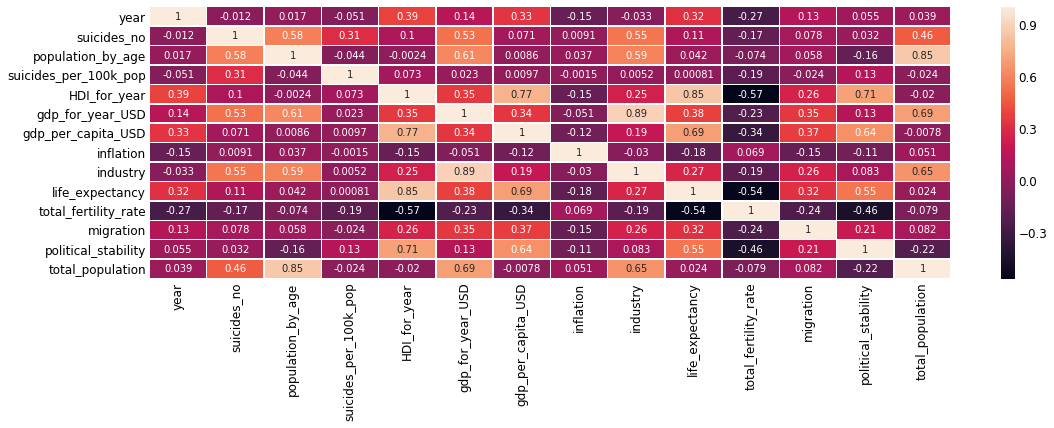

In [7]:
plt.figure(figsize = (16,5))
plot_fig=sns.heatmap(suicides.corr(), annot=True, linewidths=.5)
plot_fig.figure.savefig("plots\correlation.png")

In [8]:
suicidesPerYearPer100k = suicides.groupby(['year']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
suicidesPerYearPer100k = suicidesPerYearPer100k.rename(columns = {'population_by_age': 'total_population'})
suicidesPerYearPer100k ['suicides_per_100k_pop'] = suicidesPerYearPer100k['suicides_no']/suicidesPerYearPer100k['total_population']*100000
suicidesPerYearPer100k = suicidesPerYearPer100k.reset_index()
suicidesPerYearPer100k.head()

,year,suicides_no,total_population,suicides_per_100k_pop
0,1985,82896,749796312,11.055803
1,1986,86211,768092543,11.224038
2,1987,92625,830204029,11.156896
3,1988,87515,786772760,11.123288
4,1989,88901,820164243,10.839414


1985:
0    11.055803
Name: suicides_per_100k_pop, dtype: float64
2015:
30    9.020693
Name: suicides_per_100k_pop, dtype: float64
max:
12.635059223709613
min:
9.02069346466799


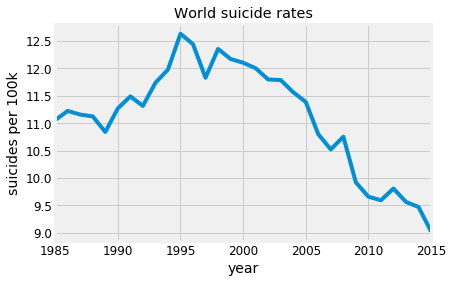

In [9]:
ax = suicidesPerYearPer100k.plot(x='year', y='suicides_per_100k_pop', legend=False)


ax.set_ylabel('suicides per 100k')
plt.title('World suicide rates')
plt.savefig("plots\world_suicide_rate.png")

print ("1985:")
print (suicidesPerYearPer100k[suicidesPerYearPer100k['year']==1985]['suicides_per_100k_pop'])
print ("2015:")
print (suicidesPerYearPer100k[suicidesPerYearPer100k['year']==2015]['suicides_per_100k_pop'])
print ("max:")
print (suicidesPerYearPer100k['suicides_per_100k_pop'].max())
print ("min:")
print (suicidesPerYearPer100k['suicides_per_100k_pop'].min())

In [10]:
suicidesPerYearPer100kContinents = suicides.groupby(['Continent_Name','year']).agg({'suicides_no': 'sum', 'population_by_age':'sum','HDI_for_year':'mean', 'political_stability': 'mean','gdp_for_year_USD': 'mean', 'inflation':'mean', 'industry':'mean', 'migration':'mean', 'political_stability':'mean'})
suicidesPerYearPer100kContinents = suicidesPerYearPer100kContinents.rename(columns = {'population_by_age': 'total_population'})
suicidesPerYearPer100kContinents ['suicides_per_100k_pop'] = suicidesPerYearPer100kContinents['suicides_no']/suicidesPerYearPer100kContinents['total_population']*100000
suicidesPerYearPer100kContinents ['gdp_per_capita_USD'] = suicidesPerYearPer100kContinents['gdp_for_year_USD']/suicidesPerYearPer100kContinents['total_population']*100000
suicidesPerYearPer100kContinents = suicidesPerYearPer100kContinents.reset_index(drop=False)

suicidesPerYearPer100kContinents.head()

,Continent_Name,year,suicides_no,total_population,HDI_for_year,political_stability,gdp_for_year_USD,inflation,industry,migration,suicides_per_100k_pop,gdp_per_capita_USD
0,Africa,1985,112,940700,0.575,NaN,6.246306e+08,4.856586,NaN,NaN,11.906027,6.640062e+07
1,Africa,1986,29,955500,NaN,NaN,8.385685e+08,7.381846,NaN,NaN,3.035060,8.776227e+07
2,Africa,1987,143,969600,NaN,NaN,1.069208e+09,8.527989,NaN,-20636.0,14.748350,1.102731e+08
3,Africa,1988,167,925000,NaN,NaN,2.143225e+09,10.886458,NaN,NaN,18.054054,2.317000e+08
4,Africa,1989,144,932900,NaN,NaN,2.191382e+09,11.047558,NaN,NaN,15.435738,2.349000e+08


Continent:Africa
1985: 
0    11.906027
Name: suicides_per_100k_pop, dtype: float64
2015: 
30    1.165756
Name: suicides_per_100k_pop, dtype: float64
max: 
18.054054054054056
min: 
0.5715751576946776
Continent:Asia
1985: 
31    17.961108
Name: suicides_per_100k_pop, dtype: float64
2015: 
61    11.156449
Name: suicides_per_100k_pop, dtype: float64
max: 
18.93991312760655
min: 
10.50894255756173
Continent:Europe
1985: 
62    13.342412
Name: suicides_per_100k_pop, dtype: float64
2015: 
92    10.753521
Name: suicides_per_100k_pop, dtype: float64
max: 
16.673053118272268
min: 
10.753520880862656
Continent:North America
1985: 
93    5.234252
Name: suicides_per_100k_pop, dtype: float64
2015: 
123    5.850606
Name: suicides_per_100k_pop, dtype: float64
max: 
7.546679877743497
min: 
5.234251627883537
Continent:Oceania
1985: 
124    12.50263
Name: suicides_per_100k_pop, dtype: float64
2015: 
154    13.610131
Name: suicides_per_100k_pop, dtype: float64
max: 
15.477006842253221
min: 
11.20625551532

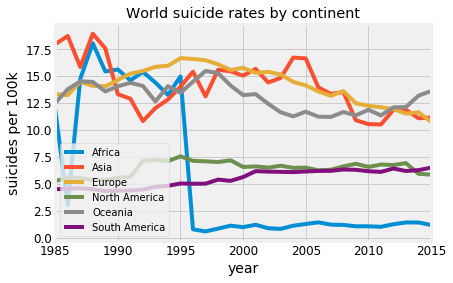

In [11]:
fig, ax = plt.subplots()

for key, grp in suicidesPerYearPer100kContinents.groupby(['Continent_Name']):
    ax = grp.plot(ax=ax, kind='line', x='year', y='suicides_per_100k_pop', label=key)
    print("Continent:" + key)
    print("1985: ")
    print (grp[grp['year']==1985]['suicides_per_100k_pop'])
    print("2015: ")
    print (grp[grp['year']==2015]['suicides_per_100k_pop'])
    print("max: ")
    print (grp['suicides_per_100k_pop'].max())
    print("min: ")
    print (grp['suicides_per_100k_pop'].min())

ax.set_ylabel ('suicides per 100k')
ax.set_xlabel ('year')
plt.title ('World suicide rates by continent')
plt.legend(loc='best')

plt.show()

ax.get_figure().savefig("plots\suicide_rates_by_continent.png")

max: 
14.184551630683968
min: 
1.236571572842575


,suicides_no,total_population,suicides_per_100k_pop
Continent_Name,,,
Africa,11215,906943055,1.236572
South America,446980,8008918797,5.581028
North America,302129,4645993589,6.503001
Oceania,84851,654397213,12.966284
Asia,1176590,8622589266,13.645437
Europe,2250558,15866261117,14.184552


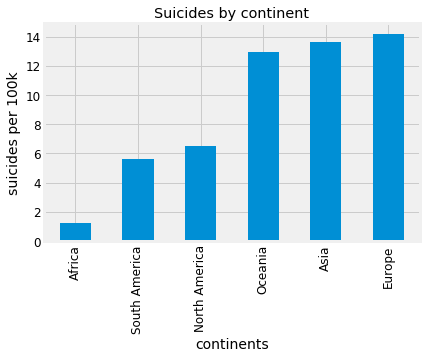

In [12]:
totalSuicidesPer100kContinents = suicides.groupby(['Continent_Name']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
totalSuicidesPer100kContinents = totalSuicidesPer100kContinents.rename(columns = {'population_by_age': 'total_population'})
totalSuicidesPer100kContinents ['suicides_per_100k_pop'] = totalSuicidesPer100kContinents['suicides_no']/totalSuicidesPer100kContinents['total_population']*100000

totalSuicidesPer100kContinents = totalSuicidesPer100kContinents.sort_values(by=['suicides_per_100k_pop'])
ax = totalSuicidesPer100kContinents.plot(y='suicides_per_100k_pop', kind='bar', legend=False, label='', title='Suicides by continent')
ax.set_ylabel('suicides per 100k')
ax.set_xlabel('continents')

plt.savefig(r"plots\Suicides_by_continent.png")

print("max: ")
print (totalSuicidesPer100kContinents ['suicides_per_100k_pop'].max())
print("min: ")
print (totalSuicidesPer100kContinents ['suicides_per_100k_pop'].min())

totalSuicidesPer100kContinents

In [13]:
suicidesPerGenderPer100k = suicides.groupby(['sex','year']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
suicidesPerGenderPer100k = suicidesPerGenderPer100k.rename(columns = {'population_by_age': 'total_population'})
suicidesPerGenderPer100k ['suicides_per_100k_pop'] = suicidesPerGenderPer100k['suicides_no']/suicidesPerGenderPer100k['total_population']*100000
suicidesPerGenderPer100k = suicidesPerGenderPer100k.reset_index(drop=False)

suicidesPerGenderPer100k.head()

,sex,year,suicides_no,total_population,suicides_per_100k_pop
0,female,1985,25168,380130063,6.620892
1,female,1986,26250,390255503,6.726363
2,female,1987,27555,423479586,6.506807
3,female,1988,25807,401792222,6.422972
4,female,1989,25742,418756685,6.147245


Gender: female
1985: 
0    6.620892
Name: suicides_per_100k_pop, dtype: float64
2015: 
30    4.184685
Name: suicides_per_100k_pop, dtype: float64
max: 
6.726362549204078
min: 
4.1846851065327595
Gender: male
1985: 
31    15.616248
Name: suicides_per_100k_pop, dtype: float64
2015: 
61    14.048259
Name: suicides_per_100k_pop, dtype: float64
max: 
19.511016707722977
min: 
14.048259072140741


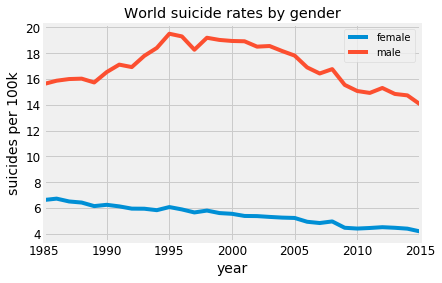

In [14]:
fig, ax = plt.subplots()

for key, grp in suicidesPerGenderPer100k.groupby(['sex']):
    ax = grp.plot(ax=ax, kind='line', x='year', y='suicides_per_100k_pop', label=key)
    print ("Gender: "+key)
    print("1985: ")
    print (grp[grp['year']==1985]['suicides_per_100k_pop'])
    print("2015: ")
    print (grp[grp['year']==2015]['suicides_per_100k_pop'])
    print("max: ")
    print (grp['suicides_per_100k_pop'].max())
    print("min: ")
    print (grp['suicides_per_100k_pop'].min())

plt.title('World suicide rates by gender')
ax.set_ylabel('suicides per 100k')
plt.legend(loc='best')

plt.show()


ax.get_figure().savefig("plots\suicide_rates_by_gender.png")



In [15]:
totalSuicidesPerGenderPer100k = suicides.groupby(['sex']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
totalSuicidesPerGenderPer100k = totalSuicidesPerGenderPer100k.rename(columns = {'population_by_age': 'total_population'})

totalSuicidesPerGenderPer100k.head()



,suicides_no,total_population
sex,,
female,1053040,19748031590
male,3219283,18957071447


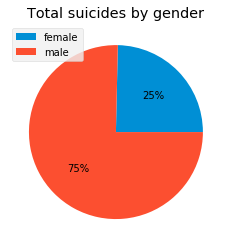

In [16]:
totalSuicidesPerGenderPer100k.plot(x='sex', y='suicides_no', kind='pie', autopct='%1.0f%%', label='', labels=None, title='Total suicides by gender')
plt.savefig(r"plots\total_suicides_by_gender.png")

In [17]:
totalSuicidesPerGenderPer100kContinents = suicides.groupby(['Continent_Name','sex']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
totalSuicidesPerGenderPer100kContinents = totalSuicidesPerGenderPer100kContinents.rename(columns = {'population_by_age': 'total_population'})
totalSuicidesPerGenderPer100kContinents ['suicides_per_100k_pop'] = totalSuicidesPerGenderPer100kContinents['suicides_no']/totalSuicidesPerGenderPer100kContinents['total_population']*100000
totalSuicidesPerGenderPer100kContinents=totalSuicidesPerGenderPer100kContinents.reset_index(drop=False)

totalMalePerContinent = totalSuicidesPerGenderPer100kContinents[totalSuicidesPerGenderPer100kContinents['sex']=='male']
totalFemalePerContinent = totalSuicidesPerGenderPer100kContinents[totalSuicidesPerGenderPer100kContinents['sex']=='female']

totalMalePerContinent = totalMalePerContinent.rename(columns = {'suicides_no': 'male_suicides_no','total_population': 'total_male_population'})
totalFemalePerContinent = totalFemalePerContinent.rename(columns = {'suicides_no': 'female_suicides_no','total_population': 'total_female_population'})

totalSuicidesPerGenderPer100kContinents = pd.merge(totalMalePerContinent[['Continent_Name','male_suicides_no','total_male_population']], totalFemalePerContinent[['Continent_Name','female_suicides_no','total_female_population']], on='Continent_Name')
totalSuicidesPerGenderPer100kContinents['total_population'] = totalSuicidesPerGenderPer100kContinents['total_male_population'] + totalSuicidesPerGenderPer100kContinents['total_female_population']

Age gap: 5-14 years
1985: 
3    0.429276
Name: suicides_per_100k_pop, dtype: float64
2015: 
183    0.577172
Name: suicides_per_100k_pop, dtype: float64
max: 
0.6202894304038096
min: 
0.35662373401764264
Age gap: 15-24 years
1985: 
0    7.923002
Name: suicides_per_100k_pop, dtype: float64
2015: 
180    6.688285
Name: suicides_per_100k_pop, dtype: float64
max: 
8.478179268070125
min: 
6.358653343522698
Age gap: 25-34 years
1985: 
1    10.882708
Name: suicides_per_100k_pop, dtype: float64
2015: 
181    8.563124
Name: suicides_per_100k_pop, dtype: float64
max: 
12.32144767789948
min: 
8.563124195044008
Age gap: 35-54 years
1985: 
2    14.443563
Name: suicides_per_100k_pop, dtype: float64
2015: 
182    10.649459
Name: suicides_per_100k_pop, dtype: float64
max: 
16.925758909330494
min: 
10.64945861315631
Age gap: 55-74 years
1985: 
4    19.409158
Name: suicides_per_100k_pop, dtype: float64
2015: 
184    12.571883
Name: suicides_per_100k_pop, dtype: float64
max: 
20.237644957850737
min: 
12.5

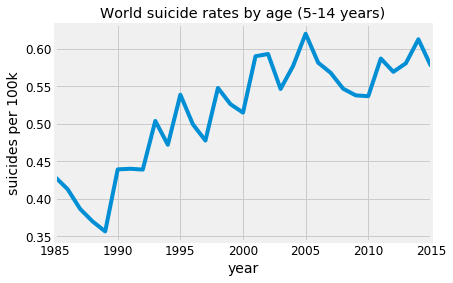

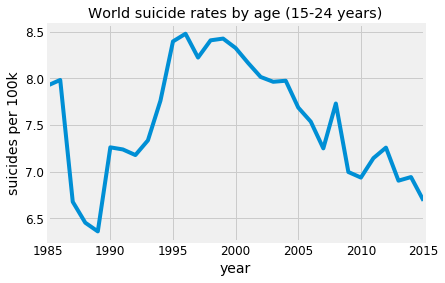

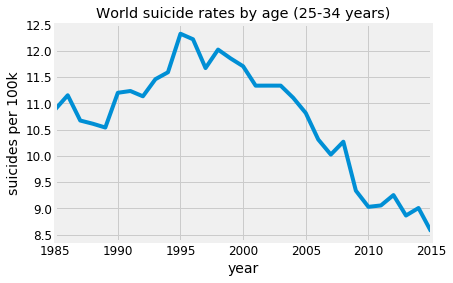

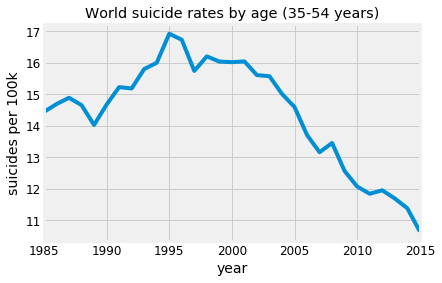

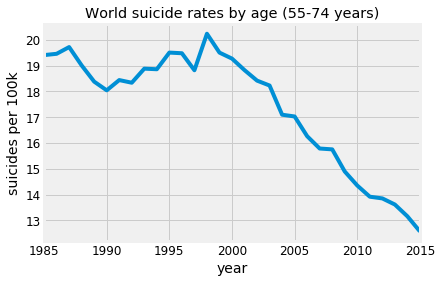

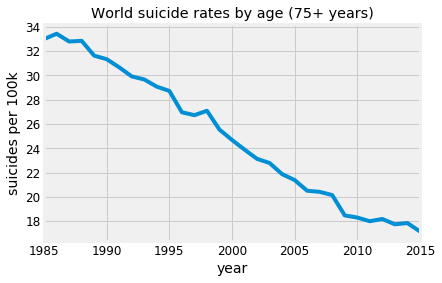

In [18]:
suicidesPerAgePer100k = suicides.groupby(['year','age']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
suicidesPerAgePer100k ['suicides_per_100k_pop'] = suicidesPerAgePer100k['suicides_no']/suicidesPerAgePer100k['population_by_age']*100000
suicidesPerAgePer100k = suicidesPerAgePer100k.reset_index(drop=False)

suicidesPerAgePer100k.head()

for value in ageValues:
    grp = suicidesPerAgePer100k[suicidesPerAgePer100k['age']==value]
    ax = grp.plot(x = 'year',y = 'suicides_per_100k_pop', legend=False)
    plt.title("World suicide rates by age (" + value + ")")
    ax.set_ylabel('suicides per 100k')
    plt.savefig('plots\world_suicide_rate_by'+value+'.png')
    
    print("Age gap: " + value)
    print("1985: ")
    print (grp[grp['year']==1985]['suicides_per_100k_pop'])
    print("2015: ")
    print (grp[grp['year']==2015]['suicides_per_100k_pop'])
    print("max: ")
    print (grp['suicides_per_100k_pop'].max())
    print("min: ")
    print (grp['suicides_per_100k_pop'].min())
    

max: 
41.46410063852308
min: 
0.0


<Figure size 864x1440 with 0 Axes>

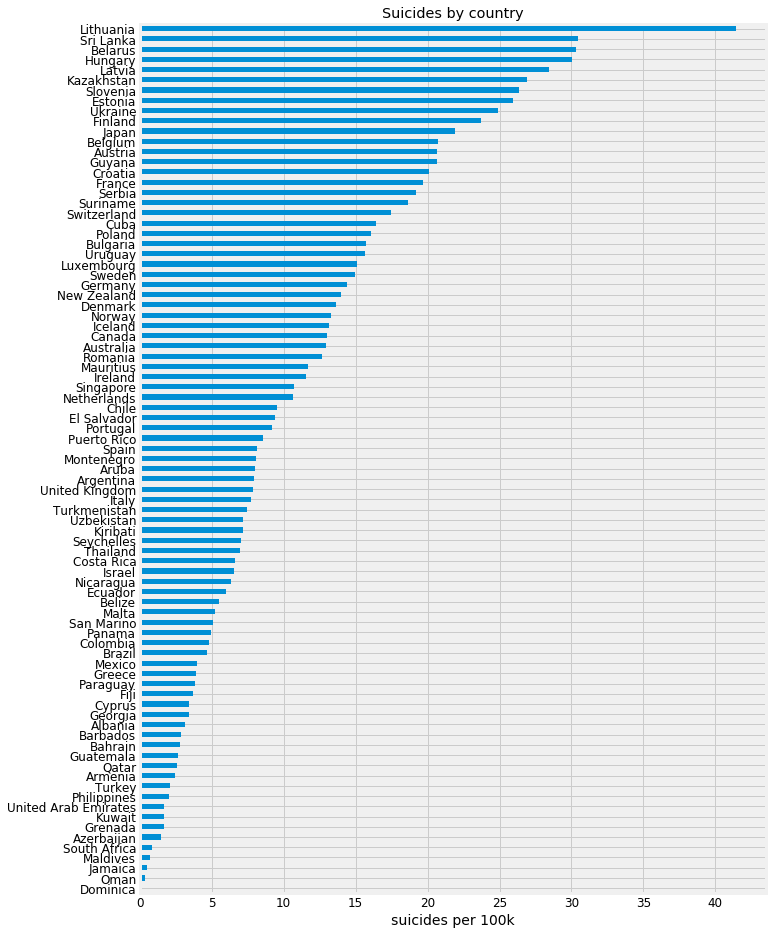

In [19]:
totalSuicidesPer100kCountries = suicides.groupby(['country']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
totalSuicidesPer100kCountries = totalSuicidesPer100kCountries.rename(columns = {'population_by_age': 'total_population'})
totalSuicidesPer100kCountries ['suicides_per_100k_pop'] = totalSuicidesPer100kCountries['suicides_no']/totalSuicidesPer100kCountries['total_population']*100000

totalSuicidesPer100kCountries = totalSuicidesPer100kCountries.sort_values(by=['suicides_per_100k_pop'])

plt.figure(figsize = (12,20))
ax = totalSuicidesPer100kCountries.plot(y='suicides_per_100k_pop', kind='barh', legend=False, label='', title='Suicides by country',figsize=(10,16))
ax.set_ylabel('')
ax.set_xlabel('suicides per 100k')


plt.savefig(r"plots\Suicides_by_country.png")

print("max: ")
print (totalSuicidesPer100kCountries ['suicides_per_100k_pop'].max())
print("min: ")
print (totalSuicidesPer100kCountries ['suicides_per_100k_pop'].min())

#totalSuicidesPer100kCountries

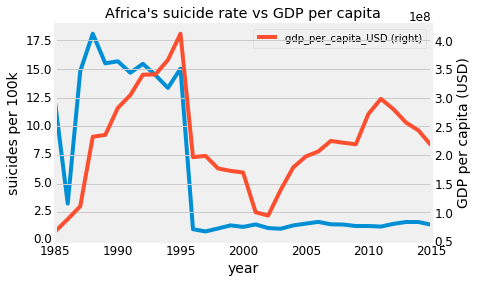

<Figure size 432x288 with 0 Axes>

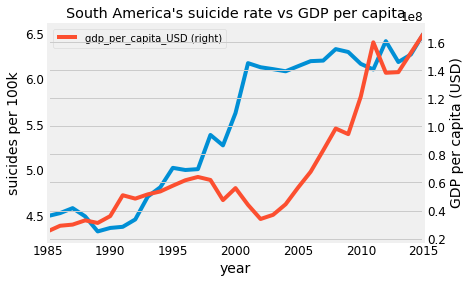

<Figure size 432x288 with 0 Axes>

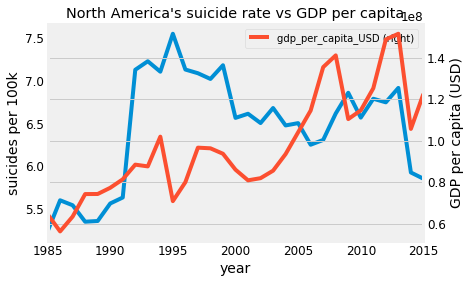

<Figure size 432x288 with 0 Axes>

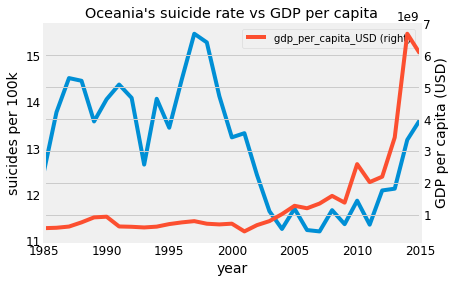

<Figure size 432x288 with 0 Axes>

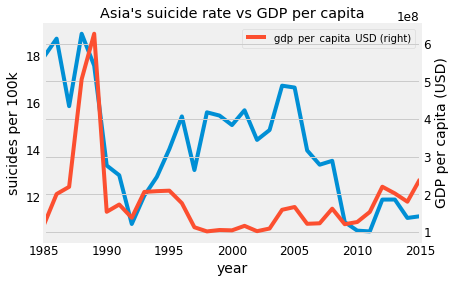

<Figure size 432x288 with 0 Axes>

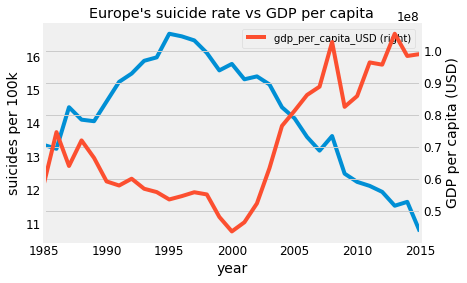

<Figure size 432x288 with 0 Axes>

In [20]:

for value in continentValues:
    grp = suicidesPerYearPer100kContinents[suicidesPerYearPer100kContinents['Continent_Name']==value]
    ax = grp.plot(x = 'year',y = ['suicides_per_100k_pop'], legend=False)

    plt.title(value + "'s suicide rate vs GDP per capita")
    ax.set_ylabel('suicides per 100k')
    ax = grp.plot(ax=ax, x ='year', y ='gdp_per_capita_USD', secondary_y=True)
    ax.set_ylabel('GDP per capita (USD)')
    plt.show()
    plt.savefig("plots\\" + value + "_suicide_rate_vs_GDP_per_100k.png")
    
    


In [21]:
from sklearn.linear_model import LinearRegression

X = suicidesPerYearPer100kContinents[suicidesPerYearPer100kContinents['Continent_Name']=='Europe'].iloc[:, -1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = suicidesPerYearPer100kContinents[suicidesPerYearPer100kContinents['Continent_Name']=='Europe'].iloc[:, -2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression

Y_pred = linear_regressor.predict(X)  # make predictions

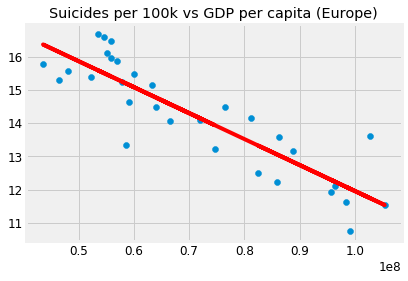

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.title("Suicides per 100k vs GDP per capita (Europe)")
plt.show()
plt.savefig("plots\Europe_suicide_rate_vs_GDP_per_100k_regression_Europe.png")

In [23]:

m = linear_regressor.coef_[0]
b = linear_regressor.intercept_
print(' y = {0} * x + {1}'.format(m, b))

 y = [-7.80127431e-08] * x + [19.75926007]


In [24]:
from math import sqrt
from scipy.stats.stats import pearsonr
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

#TODO
c3= kmeans(suicides.values,3)

ValueError: object arrays are not supported